# Interacting with CLIP

This is a self-contained notebook that shows how to download and run CLIP models, calculate the similarity between arbitrary image and text inputs, and perform zero-shot image classifications.

# Preparation for Colab

Make sure you're running a GPU runtime; if not, select "GPU" as the hardware accelerator in Runtime > Change Runtime Type in the menu. The next cells will install the `clip` package and its dependencies, and check if PyTorch 1.7.1 or later is installed.

In [1]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to c:\users\alexie\appdata\local\temp\pip-req-build-__turymd
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\Alexie\AppData\Local\Temp\pip-req-build-__turymd'


In [5]:
import numpy as np
import torch
import torchvision.transforms as transforms
from pkg_resources import packaging
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import clip
from PIL import Image
import matplotlib.pyplot as plt
print("Torch version:", torch.__version__)

Torch version: 2.4.1+cpu


# Loading the Model

`clip.available_models()` will list the names of available CLIP models.

In [9]:
# will output the list of names of available Clip Models
clip.available_models()

# Loading the CLIP mdoel and preprocessing it
#why did i use this model????
model, preprocess = clip.load("ViT-B/32", device="cpu" )

# Downloading and Loading the Dataset

In [13]:
# Load the MNIST dataset
# Convert the grayscale image to 3 channels (RGB)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to CLIP's input resolution
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel grayscale to 3-channel RGB
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize to [-1, 1] as expected by CLIP
])

# Download the MNIST dataset and apply transformations
mnist_train = MNIST(root="./data", train=True, transform=transform, download=True)
mnist_test = MNIST(root="./data", train=False, transform=transform, download=True)

# Use DataLoader to iterate over the dataset
train_loader = DataLoader(mnist_train, batch_size=32, shuffle=True)


# Processing the image and passing it through clip 

In [14]:
# Process the images and pass them through CLIP
for images, labels in train_loader:
    images = images.to("cpu")

    # Encode the images with CLIP
    with torch.no_grad():
        image_features = model.encode_image(images)

    # Optionally, you can encode labels as text and compare similarity
    text_inputs = clip.tokenize([f"This is a {label}" for label in labels]).to(images.device)
    text_features = model.encode_text(text_inputs)

    # Calculate similarity between image features and text features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarities = (image_features @ text_features.T).cpu().detach().numpy()

    print("Similarity between images and text:", similarities)
    break  # Just for example purposes; remove to process the whole dataset

Similarity between images and text: [[0.2554853  0.26694685 0.25999594 ... 0.2578294  0.26694682 0.2611128 ]
 [0.24084765 0.24592641 0.24487562 ... 0.24381167 0.24592638 0.24552229]
 [0.25651512 0.27008596 0.26937586 ... 0.26420653 0.27008593 0.26454306]
 ...
 [0.24360701 0.25306225 0.25064826 ... 0.252325   0.25306225 0.25086805]
 [0.27597457 0.2959634  0.27086627 ... 0.2718351  0.29596335 0.27530682]
 [0.24638364 0.25678298 0.25592968 ... 0.25406617 0.2567829  0.25437045]]


In [5]:


# Load the CLIP model and preprocessing
model, preprocess = clip.load("ViT-B/32", device="cpu" )

# Load the MNIST dataset
# Convert the grayscale image to 3 channels (RGB)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to CLIP's input resolution
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel grayscale to 3-channel RGB
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize to [-1, 1] as expected by CLIP
])

# Download the MNIST dataset and apply transformations
mnist_train = MNIST(root="./data", train=True, transform=transform, download=True)
mnist_test = MNIST(root="./data", train=False, transform=transform, download=True)

# Use DataLoader to iterate over the dataset
train_loader = DataLoader(mnist_train, batch_size=32, shuffle=True)

# Process the images and pass them through CLIP
for images, labels in train_loader:
    images = images.to("cpu")

    # Encode the images with CLIP
    with torch.no_grad():
        image_features = model.encode_image(images)

    # Optionally, you can encode labels as text and compare similarity
    text_inputs = clip.tokenize([f"This is a {label}" for label in labels]).to(images.device)
    text_features = model.encode_text(text_inputs)

    # Calculate similarity between image features and text features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarities = (image_features @ text_features.T).cpu().detach().numpy()

    print("Similarity between images and text:", similarities)
    break  # Just for example purposes; remove to process the whole dataset


Similarity between images and text: [[0.25427318 0.2539991  0.2608916  ... 0.2539991  0.24615034 0.26089156]
 [0.256691   0.25804394 0.26066995 ... 0.25804394 0.24674    0.26066992]
 [0.26579177 0.26511446 0.26891652 ... 0.26511446 0.25647053 0.26891652]
 ...
 [0.26321083 0.26971287 0.26485637 ... 0.26971287 0.2552529  0.26485637]
 [0.24513367 0.24646153 0.24646574 ... 0.24646153 0.27212775 0.24646571]
 [0.2486472  0.25426012 0.25177544 ... 0.25426012 0.24449216 0.25177544]]


im now processing the data getting an image from mnist adding the promt and gettin an image with teh label after the two prompts are added together 

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import clip
import re
from PIL import Image
import random
import matplotlib.pyplot as plt

# Load the CLIP model and preprocessing
device = "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Load the MNIST dataset
# Convert the grayscale image to 3 channels (RGB)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to CLIP's input resolution
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel grayscale to 3-channel RGB
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize to [-1, 1] as expected by CLIP
])

# Download the MNIST dataset and apply transformations
mnist_train = MNIST(root="./data", train=True, transform=transform, download=True)
mnist_test = MNIST(root="./data", train=False, transform=transform, download=True)

# Helper function to parse the text prompt
def parse_text_prompt(prompt):
    """Parses a text prompt like 'add 3' or 'subtract 2' and returns the operation."""
    match = re.match(r'(add|subtract) (\d+)', prompt.lower())
    if not match:
        raise ValueError("Prompt must be in the form of 'add X' or 'subtract X'")
    operation, value = match.groups()
    value = int(value)
    return operation, value

# Function to modify the label based on the text prompt
def modify_label(original_label, prompt):
    operation, value = parse_text_prompt(prompt)
    if operation == 'add':
        return original_label + value
    elif operation == 'subtract':
        return original_label - value
    return original_label

# Use DataLoader to iterate over the dataset
train_loader = DataLoader(mnist_train, batch_size=32, shuffle=True)

# Example prompt: "add 2"
prompt = "add 2"


# Get a random sample from MNIST
for images, labels in train_loader:
    images = images.to("cpu")
    
    # Select the first image and its label
    original_image = images[0]
    original_label = labels[0].item()
    

    # Print the original label (for example, it might be 3)
    print(f"Original label: {original_label}")

    # Modify the label based on the prompt
    new_label = modify_label(original_label, prompt)

    # Clip the label between 0 and 9 (since MNIST digits are 0-9)
    new_label = max(0, min(9, new_label))
    print(f"New label based on prompt '{prompt}': {new_label}")

    # Find an image from the MNIST dataset with the new label
    mnist_images_with_new_label = [img for img, label in mnist_train if label == new_label]
    if mnist_images_with_new_label:
        # Randomly select an image of the new label from the dataset
        new_image = random.choice(mnist_images_with_new_label)
        
        # Convert the images back to PIL for displaying
        original_image_pil = transforms.ToPILImage()(original_image)
        new_image_pil = transforms.ToPILImage()(new_image)
        
        # Display the original and new image side by side
        fig, axs = plt.subplots(1, 2, figsize=(8, 4))

        axs[0].imshow(original_image_pil)
        axs[0].set_title(f"Original Image: {original_label}")
        axs[0].axis('off')

        axs[1].imshow(new_image_pil)
        axs[1].set_title(f"New Image: {new_label}")
        axs[1].axis('off')

        plt.show()

    break  # Just for example purposes; remove to process the whole dataset


Original label: 1
New label based on prompt 'add 2': 3


now im going to extend the project to do doubble digits by concating the mnist images makijng a double digit image 

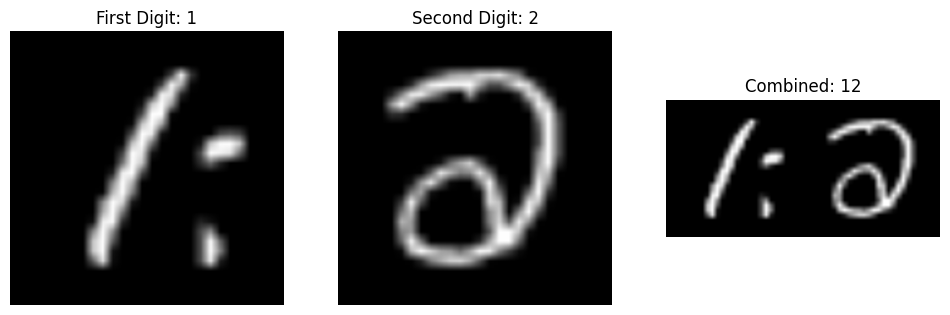

In [17]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from PIL import ImageOps, Image
import matplotlib.pyplot as plt
import random
import re

# Load MNIST dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to CLIP's input resolution
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel grayscale to 3-channel RGB
    transforms.ToTensor(),  # Convert to tensor
])

mnist_train = MNIST(root="./data", train=True, transform=transform, download=True)
mnist_test = MNIST(root="./data", train=False, transform=transform, download=True)

# Function to create double-digit images
def create_double_digit_image(image_1, image_2):
    # Ensure both images are the same size
    image_1 = ImageOps.pad(image_1, (image_1.width, image_1.height))
    image_2 = ImageOps.pad(image_2, (image_2.width, image_1.height))
    
    # Concatenate the two images side by side
    double_digit_image = Image.new('RGB', (image_1.width + image_2.width, image_1.height))
    double_digit_image.paste(image_1, (0, 0))
    double_digit_image.paste(image_2, (image_1.width, 0))
    
    return double_digit_image

# Function to get an MNIST image by its label
def get_image_by_label(label, mnist_data):
    mnist_images = [img for img, lbl in mnist_data if lbl == label]
    if mnist_images:
        return random.choice(mnist_images)
    else:
        raise ValueError(f"No images found for label {label}")

# Text prompt
prompt = "add 12"

# Extract digits from the prompt (assumes prompt format like "add 12")
match = re.search(r'add (\d+)', prompt)
if match:
    double_digit = int(match.group(1))
else:
    raise ValueError("Invalid prompt format. Expected something like 'add 12'.")

# Extract the two digits from the double-digit number
first_digit = double_digit // 10  # Tens place
second_digit = double_digit % 10  # Units place

# Retrieve images for the first and second digits from the MNIST dataset
first_digit_image = get_image_by_label(first_digit, mnist_train)
second_digit_image = get_image_by_label(second_digit, mnist_train)

# Convert the images to PIL format for displaying
first_digit_pil = transforms.ToPILImage()(first_digit_image)
second_digit_pil = transforms.ToPILImage()(second_digit_image)

# Create the combined double-digit image
double_digit_image = create_double_digit_image(first_digit_pil, second_digit_pil)

# Display the original digits and the combined image
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(first_digit_pil)
axs[0].set_title(f"First Digit: {first_digit}")
axs[0].axis('off')

axs[1].imshow(second_digit_pil)
axs[1].set_title(f"Second Digit: {second_digit}")
axs[1].axis('off')

axs[2].imshow(double_digit_image)
axs[2].set_title(f"Combined: {first_digit}{second_digit}")
axs[2].axis('off')

plt.show()

